In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv('/content/bigmart_data.csv')
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,NaN,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [4]:
df.columns

Index(['Item_Identifier', 'Item_Weight', 'Item_Fat_Content', 'Item_Visibility',
       'Item_Type', 'Item_MRP', 'Outlet_Identifier',
       'Outlet_Establishment_Year', 'Outlet_Size', 'Outlet_Location_Type',
       'Outlet_Type', 'Item_Outlet_Sales'],
      dtype='object')

In [5]:
df1=df.groupby('Item_Identifier')['Item_MRP'].mean().reset_index().head(10)
df1

,Item_Identifier,Item_MRP
0,DRA12,141.865400
1,DRA24,164.086800
2,DRA59,185.179900
3,DRB01,189.586333
4,DRB13,189.693000
5,DRB24,154.465600
6,DRB25,106.893800
7,DRB48,39.253629
8,DRC01,48.969200
9,DRC12,190.218800


<Axes: xlabel='Item_Identifier', ylabel='Item_MRP'>

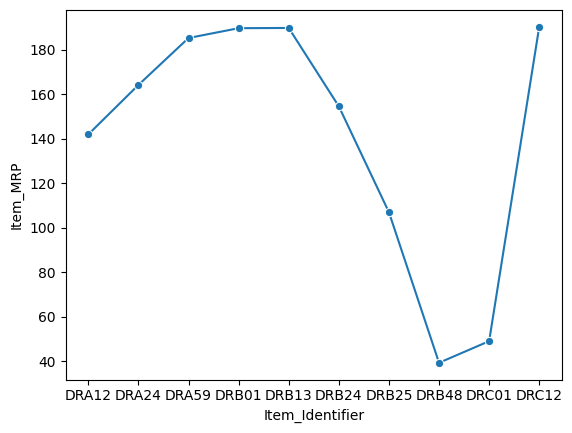

In [6]:
sns.lineplot(x='Item_Identifier',y='Item_MRP',data=df1,marker='o')


In [7]:
df2=df.groupby('Outlet_Type')['Item_Outlet_Sales'].mean().reset_index()
df2

,Outlet_Type,Item_Outlet_Sales
0,Grocery Store,339.828500
1,Supermarket Type1,2316.181148
2,Supermarket Type2,1995.498739
3,Supermarket Type3,3694.038558


<Axes: xlabel='Outlet_Type', ylabel='Item_Outlet_Sales'>

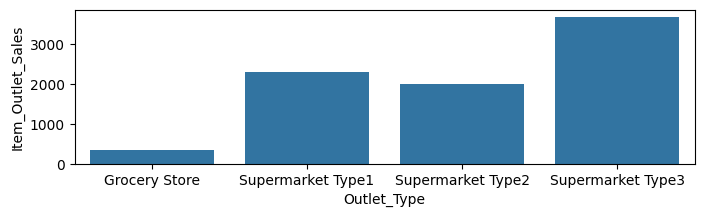

In [8]:

plt.figure(figsize=(8,2))
sns.barplot(x='Outlet_Type',y='Item_Outlet_Sales',data=df2)

([<matplotlib.patches.Wedge at 0x7d42887a9190>,
 [Text(1.091011646498503, 0.14033384197913948, 'Grocery Store'),
  Text(0.4715614400595944, 0.9937956571896065, 'Supermarket Type1'),
  Text(-1.017083991974399, 0.4189751224946662, 'Supermarket Type2'),
  Text(0.3764060815655935, -2.065990915217305, 'Supermarket Type3')],
 [Text(0.595097261726456, 0.07654573198862152, '4.071974%'),
  Text(0.2572153309415969, 0.542070358467058, '27.753496%'),
  Text(-0.5547730865314904, 0.22853188499709062, '23.910942%'),
  Text(0.2867855859547379, -1.5740883163560415, '44.263588%')])

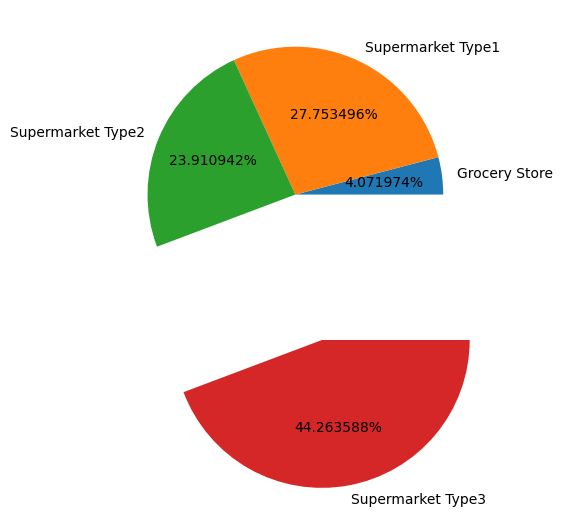

In [ ]:
plt.pie(df2['Item_Outlet_Sales'],labels=df2['Outlet_Type'],autopct='%2f%%',explode=(0,0,0,1))

In [10]:
df3=df['Item_MRP']
df3

,Item_MRP
0,249.8092
1,48.2692
2,141.6180
3,182.0950
4,53.8614
...,...
8518,214.5218
8519,108.1570
8520,85.1224
8521,103.1332


<Axes: xlabel='Item_MRP', ylabel='Count'>

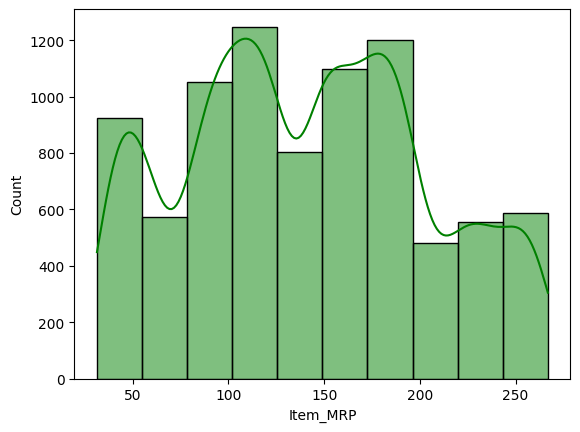

In [11]:
sns.histplot(df3,color='green',bins=10,kde=True,edgecolor='black')

In [13]:
df['Item_Weight']


,Item_Weight
0,9.300
1,5.920
2,17.500
3,19.200
4,8.930
...,...
8518,6.865
8519,8.380
8520,10.600
8521,7.210


<Axes: ylabel='Item_Weight'>

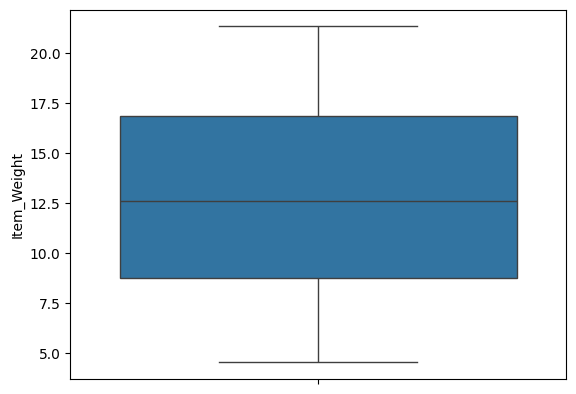

In [15]:
sns.boxplot(df['Item_Weight'])

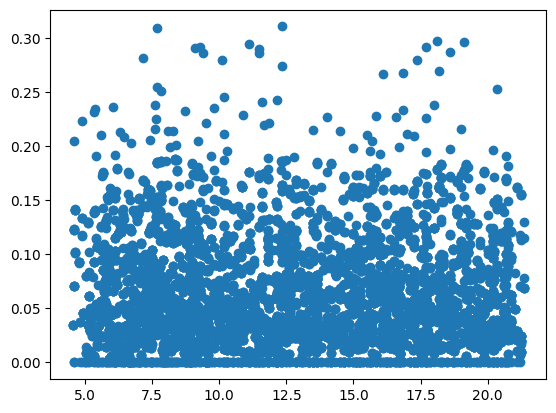

In [32]:
plt.scatter(df['Item_Weight'],df['Item_Visibility'])

In [28]:
df4=df['Item_Outlet_Sales']
df4


,Item_Outlet_Sales
0,3735.1380
1,443.4228
2,2097.2700
3,732.3800
4,994.7052
...,...
8518,2778.3834
8519,549.2850
8520,1193.1136
8521,1845.5976


<Axes: ylabel='Item_Outlet_Sales'>

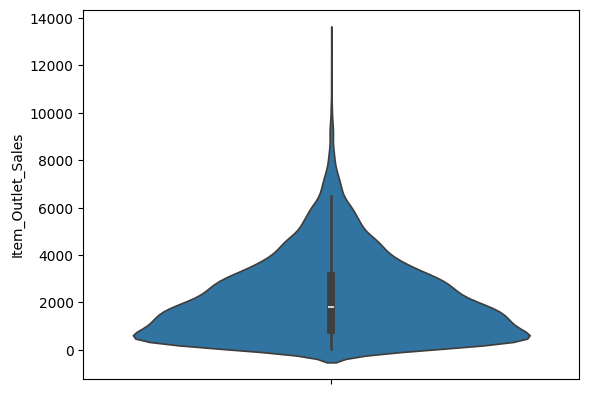

In [30]:
sns.violinplot(df4)

<Axes: xlabel='Item_Weight', ylabel='Item_Visibility'>

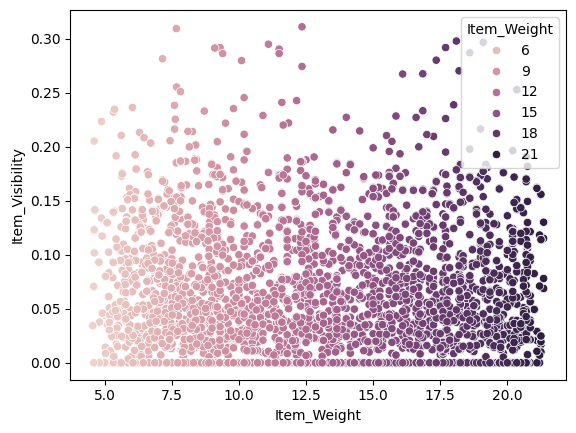

In [31]:
sns.scatterplot(x='Item_Weight',y='Item_Visibility',data=df,hue='Item_Weight')

<Axes: >

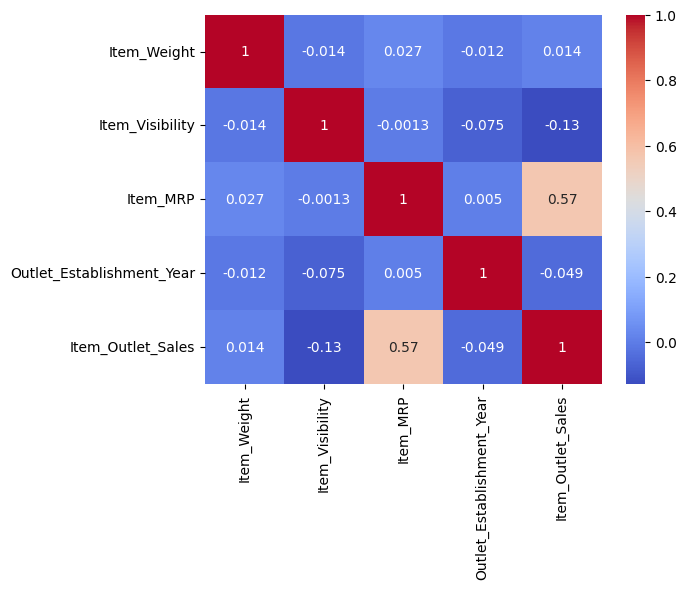

In [35]:
corr=df.corr(numeric_only=True)
sns.heatmap(corr,annot=True,cmap='coolwarm')